#### Analysis on the job ads
In this notebook I am analysing the stored job ads, with the goal of gathering interesting insights.

In [3]:
import json
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from fastai.text import TextList
import seaborn as sns

In [5]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk import stem

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Raffaele\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raffaele\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# Read JSON file
with open('data/job_ads_container_large.json') as data_file:
    job_ads_container = json.load(data_file)

In [7]:
len(job_ads_container)

236

## Text Lemmatization, Stemming and Vectorising with nlkt and sk-learn

In [8]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [9]:
description_text = [job_ads_container[item]['Description'] for item in job_ads_container]

In [10]:
description_text[0]

" Role Profile Regulatory Reporting is a new function within UK Regulation. The successful candidate will report to the Regulatory Reporting Manager as part of a team totalling 4. UK Regulation's role is to provide regulatory support for London Stock Exchange's Primary and Secondary Markets and to supervise the trading which takes place on them. It comprises three teams:Primary Market Regulation (PMR): administers the Exchange's Primary Market rules such as the Admission & Disclosure Standards and operates AIM, a primary market for small and medium sized companies, undertaking regulation of both AIM companies and Nominated  Advisers (Nomads).Rules and Compliance: responsible for assisting the FCA regulated entities within UK Capital Markets in complying with applicable FCA rules, R&C is the focal point for communication with the regulator.Market Supervision (MSU): responsible for monitoring member firm activity on the London Stock Exchange and Turquoise markets, MSU's activities includ

In [11]:
description_text_words = [nltk.word_tokenize(text) for text in description_text]

In [12]:
# splitting each text in words to perform lemmatization and stemming
description_text_lem = [[wnl.lemmatize(word) for word in text] for text in description_text_words]
description_text_stem = [[porter.stem(word) for word in text] for text in description_text_words]

In [13]:
# Re-joining the lists into a text
separator = ' '
descriptions_lem = [separator.join(text) for text in description_text_lem]
descriptions_stem = [separator.join(text) for text in description_text_stem]

### _Original text_

In [55]:
description_text[0][20:130]

'Spoken Language Understanding team is looking for a senior data scientist to join a recently established team in London.'

### _Stemmed text_

In [62]:
descriptions_stem[0][20:130]

'spoken languag understand team is look for a senior data scientist to join a recent establish team in london .'

### _Lemmatized text_

In [81]:
basic_sentence=description_text[0][28:148]
lemmatized_sentence=[wnl.lemmatize(word, pos = 'v') for word in basic_sentence.split()]
separator.join(lemmatized_sentence)

'Spoken Language Understanding team be look for a senior data scientist to join a recently establish team in London.'

In [77]:
print("spoken :", wnl.lemmatize("spoken", pos = 'v')) 
print("corpora :", wnl.lemmatize("corpora")) 

# a denotes adjective in "pos" 
print("better :", lemmatizer.lemmatize("better", pos ="a")) 

spoken : speak
corpora : corpus
better : good


In [14]:
vectorizer = TfidfVectorizer(input='content', stop_words='english')
dtm = vectorizer.fit_transform(descriptions_stem).toarray()
vocab = np.array(vectorizer.get_feature_names())
dtm.shape, len(vocab)

((236, 4801), 4801)

Let's take a look at a random word in my vocabulary

In [16]:
vocab[1260]

'deriv'

In [17]:
dtm

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12535323, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.06642016],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [18]:
scores = {'Words': vocab,'Scores':sum(dtm)}
word_scores = pd.DataFrame(data = scores)
word_scores.sort_values(by = ['Scores'],inplace = True, ascending = False)

In [19]:
key_skills = ['python',
             'experi','junior','senior',
             'sql',
             'nlp',
             'marketing', 'customer','market',
              'estate',
              'product','research','analytics','analyt',
             'statist','model',
             'recommend',
             'financial','fintech','financ',   
             'opencv','vision',
             'social',
             'java','c++',
             'deep','neural',
              'machin',
              'aw'
             ]

In [20]:
word_scores[word_scores.Words.isin(key_skills)]

,Words,Scores
1651,experi,13.516506
2557,machin,10.827152
2747,model,8.210364
3347,product,8.118178
3892,senior,7.570390
3447,python,6.873741
332,analyt,6.318467
4168,statist,5.726214
2597,market,5.134676
3659,research,4.309532


In [21]:
key_skills_few = ['python',
             'experi','senior',
             'sql',
             'nlp','market',
              'estate',
              'product','research','analyt',
             'statist','model',
             'recommend','fintech','financ',   
             'vision',
             'social',
             'java','c++',
             'deep',
              'machin',
              'aw'
             ]

In [22]:
word_scores[word_scores.Words.isin(key_skills_few)]

,Words,Scores
1651,experi,13.516506
2557,machin,10.827152
2747,model,8.210364
3347,product,8.118178
3892,senior,7.570390
3447,python,6.873741
332,analyt,6.318467
4168,statist,5.726214
2597,market,5.134676
3659,research,4.309532


In [24]:
word_scores[0:50]

,Words,Scores
1170,data,30.452247
4752,work,15.526964
1651,experi,13.516506
4421,thi,12.705174
2442,learn,12.073532
3833,scientist,10.960750
2557,machin,10.827152
4328,team,10.730849
3825,scienc,10.387162
1280,develop,10.266375


### _Based on the analysis, what are the most recurring key words in data science job ads?_  

 - **Experience**
 - **Product, Market**
 - **Modelling, Statistics**
 - **Python**
 - **SQL**
 - **NLP**
 - **AWS**
 - **Senior** rather than **Junior**
 - **Research, Insight, Analytics**
 - **Deep Learning**
 - **FinTech**

Computer vision is less present, along with social media and java.

## Comparing the advertised salary and contract type to the presence of keywords in the job description

I am going to restrict the analysis to the words contained in _key_skills_, as I don't want highly recurring words, such as "data science" and "work", to skew my analysis. This is obviously a personal choice and a very valid alternative approach would be to consider the 50 (or more) most common words, and to extend the analysis to more job ads. Unfortunately the market now (i.e. July 2020) sucks, and there aren't that many advertised positions online. The scraping notebook may be extended to include other job boards, which might provide a more well-rounded picture of the job market. another thing that could be done is to compare the scraped job descriptions, to make sure that there are no repetitions, e.g. same job advertised by multiple recruitment agencies.

In [25]:
features_indexes = word_scores[word_scores.Words.isin(key_skills_few)].index

In [26]:
features_indexes

Int64Index([1651, 2557, 2747, 3347, 3892, 3447,  332, 4168, 2597, 3659, 2885,
            4112, 1221,  501, 4662, 1762, 3558, 2325, 4019, 1758],
           dtype='int64')

In [27]:
factors_matrix = dtm[:,features_indexes]

In [28]:
factors_matrix[:,5]

array([0.01650872, 0.02469581, 0.02923072, 0.03052746, 0.        ,
       0.02677056, 0.02357064, 0.07317131, 0.04129627, 0.        ,
       0.        , 0.05679153, 0.03302182, 0.        , 0.06719614,
       0.0403115 , 0.        , 0.16743853, 0.        , 0.0401976 ,
       0.03302182, 0.0403115 , 0.09265099, 0.03384617, 0.07285665,
       0.03697273, 0.07344292, 0.        , 0.05633807, 0.        ,
       0.        , 0.        , 0.0246638 , 0.02156083, 0.06421645,
       0.05986762, 0.05053548, 0.06068231, 0.08631201, 0.03619814,
       0.03137913, 0.03082197, 0.09844609, 0.03486581, 0.03193568,
       0.        , 0.        , 0.        , 0.03117956, 0.04619584,
       0.03866244, 0.06060719, 0.07372114, 0.09830191, 0.03566377,
       0.0639305 , 0.05264306, 0.03487048, 0.04319635, 0.04532997,
       0.02797422, 0.        , 0.02658354, 0.03256582, 0.10074488,
       0.03733225, 0.0401244 , 0.0610656 , 0.05318229, 0.02721731,
       0.03611254, 0.0579717 , 0.        , 0.        , 0.     

So we have 167 observations (i.e. jobs) with 24 features (i.e. key skills). Now I need to add the salary information.

## Testing salary value extraction

In [37]:
salary_field=job_ads_container[list(job_ads_container.keys())[45]]['Salary'].split()

from statistics import mean

def salary_extractor(test_list):
    '''
    This function takes the salary field within each job's scraped data and extracts an average value for the proposed salary, adjusted per annum
    '''
    extremes = []
    av_salary = None
    salary = None
    for item in test_list:
        if item[0]=='£':
            extremes.append(float(item[1:].replace(',', '')))
    if extremes:
        av_salary = mean(extremes)
    
        if 'day' in test_list or 'Day' in test_list:
            salary = av_salary* 260
        elif 'annum' in test_list or 'annum' in test_list:
            salary=av_salary
        else:
            salary=av_salary
    
    return salary

            
salary_extractor(salary_field)

72500.0

In [38]:
job_salary_df = pd.DataFrame(columns = ['Job_id','Salary'])
job_ids = []
job_salaries = []
for item in job_ads_container:
    job_ids.append(item)
    try:
        salary_field=job_ads_container[str(item)]['Salary'].split()
        salary = salary_extractor(salary_field)
        
    except AttributeError:
        salary = None

    job_salaries.append(salary)

job_salary_df.Job_id = job_ids
job_salary_df.Salary = job_salaries
'''
Here I build a dataframe with:
    Job_id
    Salary - as calculated in the salary_extractor function
    python...neural - key skill words with values for each observation
'''

'\nHere I build a dataframe with:\n    Job_id\n    Salary - as calculated in the salary_extractor function\n    python...neural - key skill words with values for each observation\n'

In [39]:
for i in features_indexes:
    job_salary_df[vocab[i]] = dtm[:,i]

In [40]:
job_salary_df.to_csv('data/job_salary_df_v2.csv')
job_salary_df.head()

,Job_id,Salary,experi,machin,model,product,senior,python,analyt,statist,...,nlp,sql,deep,aw,vision,fintech,recommend,java,social,financ
0,40846243,NaN,0.000000,0.055164,0.000000,0.000000,0.000000,0.016509,0.03659,0.000000,...,0.0,0.000000,0.029097,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1,40970625,NaN,0.051587,0.082521,0.028517,0.028517,0.000000,0.024696,0.00000,0.097148,...,0.0,0.035533,0.000000,0.000000,0.05199,0.0,0.0,0.0,0.0,0.0
2,40973478,60000.0,0.142473,0.065116,0.101262,0.000000,0.000000,0.029231,0.00000,0.076658,...,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
3,41046261,143000.0,0.085025,0.034002,0.035251,0.000000,0.214033,0.030527,0.03383,0.080059,...,0.0,0.043923,0.000000,0.052876,0.00000,0.0,0.0,0.0,0.0,0.0
4,40865054,57500.0,0.035068,0.028048,0.000000,0.000000,0.176553,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


### Fraction of missing values in Salary

In [41]:
job_salary_df['Salary'].isnull().sum()/len(job_salary_df['Salary'])

0.2457627118644068

### Salary against key words correlation heatmap

In [42]:
corr = job_salary_df.drop(['Job_id'],axis=1).corr()

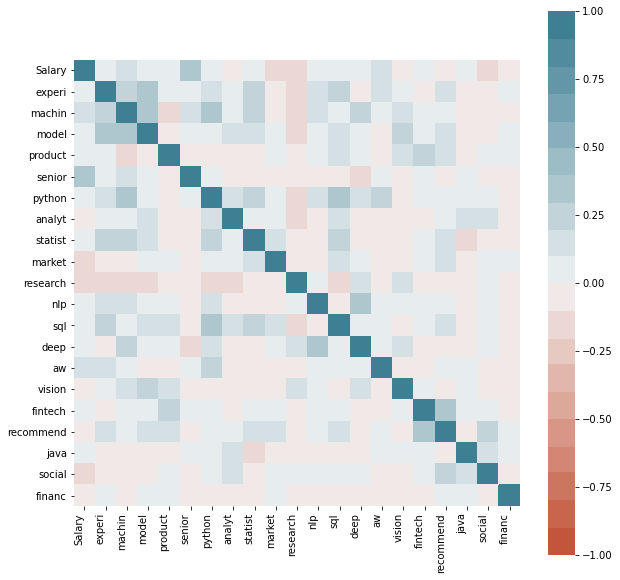

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    #cmap = sns.color_palette("RdBu_r",7),
    cmap=sns.diverging_palette(20, 220, n=20),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

plt.savefig('data/corr_heatmap_v3.png')

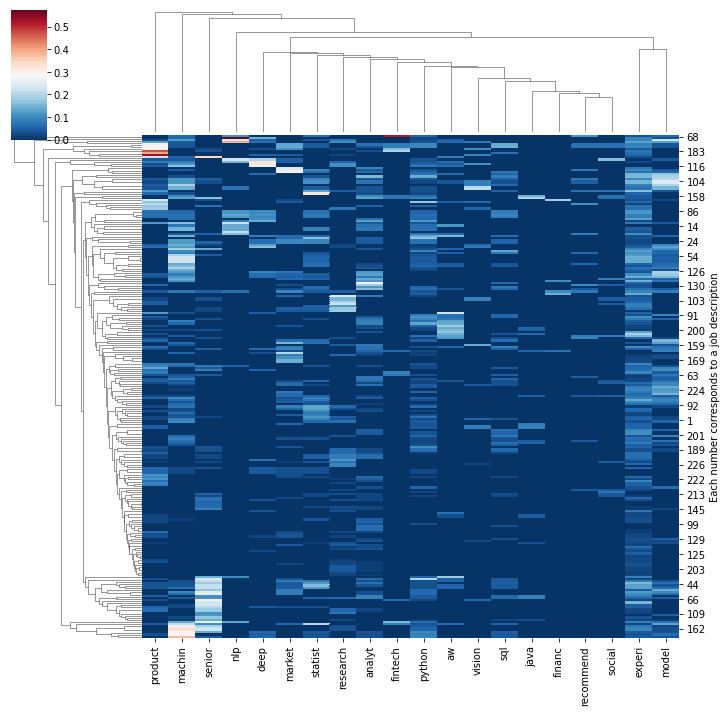

In [44]:
#cmap = sns.color_palette("RdBu_r",7)
skills_map = job_salary_df.drop(['Job_id','Salary'],axis=1)

sns.set_palette("husl")
g = sns.clustermap(skills_map,cmap = sns.color_palette("RdBu_r",100))
g.ax_heatmap.set_ylabel('Each number corresponds to a job description')
plt.savefig('data/cluster_heatmap.png')

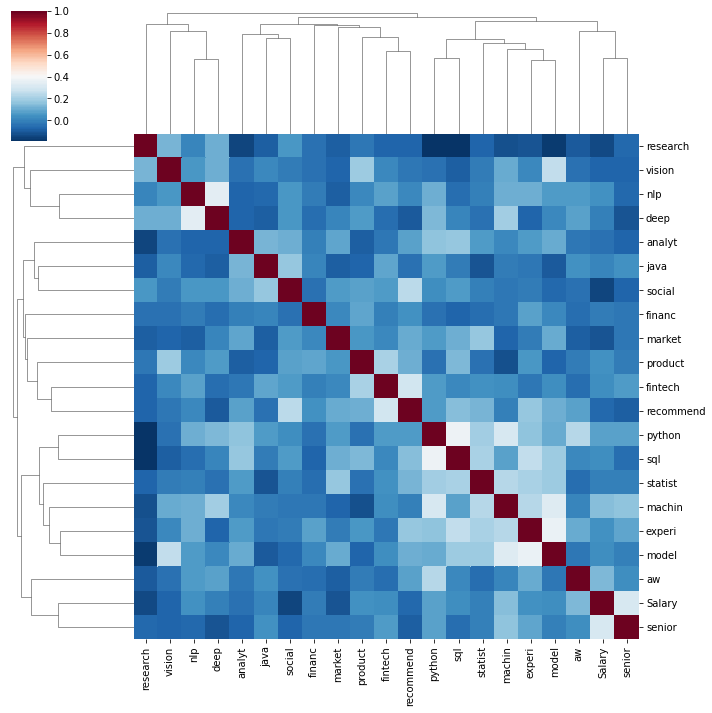

In [45]:
sns.set_palette("husl")
g = sns.clustermap(corr,cmap = sns.color_palette("RdBu_r",100))
plt.savefig('data/corr_cluster_heatmap.png')

_July_: Unfortunately 69% of the values are missing, which makes the analysis less valuable.

_October_ : 25% of values are missing.

### _Based on this analysis, what are the clearest correlations present in the dataset?_

## Trends in job ads
Analysis based on the frequency of appearance of key words.
### Permanent or Contract
When unspecified, I am inclined to think it's a permanent job.

In [46]:
p = 0 # permanent
c = 0 # contract
total = 0
for item in job_ads_container:
    total+=1
    if job_ads_container[item]['Contract']:
        if 'Permanent' in job_ads_container[item]['Contract']:
            p+=1
        elif 'Contract' in job_ads_container[item]['Contract']:
            c+=1
    elif job_ads_container[item]['Salary']:
        if 'annum' in job_ads_container[item]['Salary']:
            p+=1
        elif 'day' in job_ads_container[item]['Salary']:
            c+=1
        
print('permanent = ',p,'; contract = ',c,'; total = ',total)

permanent =  192 ; contract =  42 ; total =  236


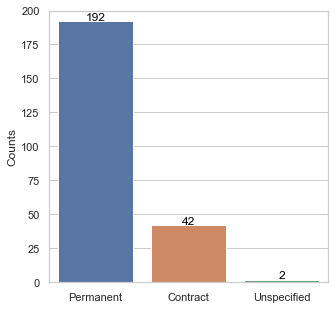

In [55]:
sns.set(style="whitegrid")
data=pd.DataFrame(columns=["Contract","Counts"])
spec = ['Permanent','Contract','Unspecified']
counts = [p,c,total-p-c]
data.Contract= spec
data.Counts = counts

plt.figure(figsize=(5,5))
ax = sns.barplot(x='Contract', y="Counts", data=data)
ax.set_xlabel(' ')
ax.set_ylim(0,200)

x_in=0
for index, row in data.iterrows():
    ax.text(x_in,row.Counts+1, row.Counts, color='black', ha="center")
    x_in+=1
plt.savefig('data/contract_barplot.png')

### Senior or...not

In [48]:
s =0
total = 0
for desc in descriptions_stem:
    if 'senior' in desc:
        s+=1
    total+=1
print('Senior = ',s,'; total = ',total)

Senior =  73 ; total =  236


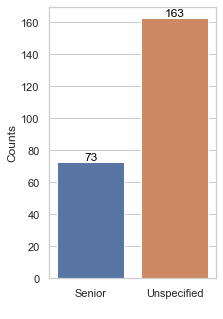

In [56]:
sns.set(style="whitegrid")
data=pd.DataFrame(columns=["Senior","Counts"])
spec = ['Senior','Unspecified']
counts = [s,total-s]
data.Senior= spec
data.Counts = counts

plt.figure(figsize=(3,5))
ax = sns.barplot(x='Senior', y="Counts", data=data)
ax.set_xlabel(' ')
ax.set_ylim(0,170)

x_in=0
for index, row in data.iterrows():
    ax.text(x_in,row.Counts+1, row.Counts, color='black', ha="center")
    x_in+=1
plt.savefig('data/senior_barplot.png')

### Mentions of popular skills

In [58]:
python=0
sql=0
nlp=0
deep=0
check = 0
total=0
for desc in descriptions_stem:
    total+=1
    if 'python' in desc:
        python+=1
    if 'sql' in desc:
        sql+=1
    if 'nlp' in desc:
        nlp+=1
    if 'deep' in desc:
        deep+=1
    if 'python' not in desc and 'sql' not in desc and 'nlp' not in desc and 'deep' not in desc:
        check+=1
        
print('python = ',python,'; SQL = ',sql,'; NLP = ',nlp,'; Deep Learning = ',deep,'; None of these = ',check,'; total = ',total)

python =  143 ; SQL =  80 ; NLP =  26 ; Deep Learning =  43 ; None of these =  70 ; total =  236


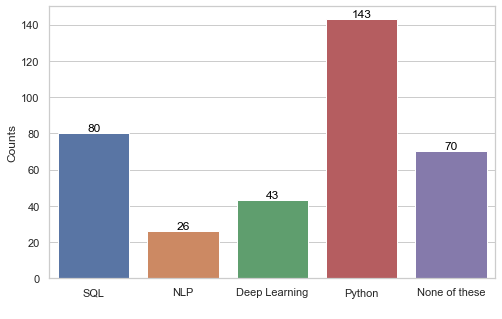

In [60]:
sns.set(style="whitegrid")
data=pd.DataFrame(columns=["Skills","Counts"])
data.Skills= skills
data.Counts = counts

plt.figure(figsize=(8,5))
ax = sns.barplot(x='Skills', y="Counts", data=data)
ax.set_xlabel(' ')
ax.set_ylim(0,150)

x_in=0
for index, row in data.iterrows():
    ax.text(x_in,row.Counts+1, row.Counts, color='black', ha="center")
    x_in+=1
plt.savefig('data/skills_barplot.png')

In [53]:
for index, row in data.iterrows():
    print(row.Skills)

SQL
NLP
Deep Learning
Python
None of these


## WordCloud

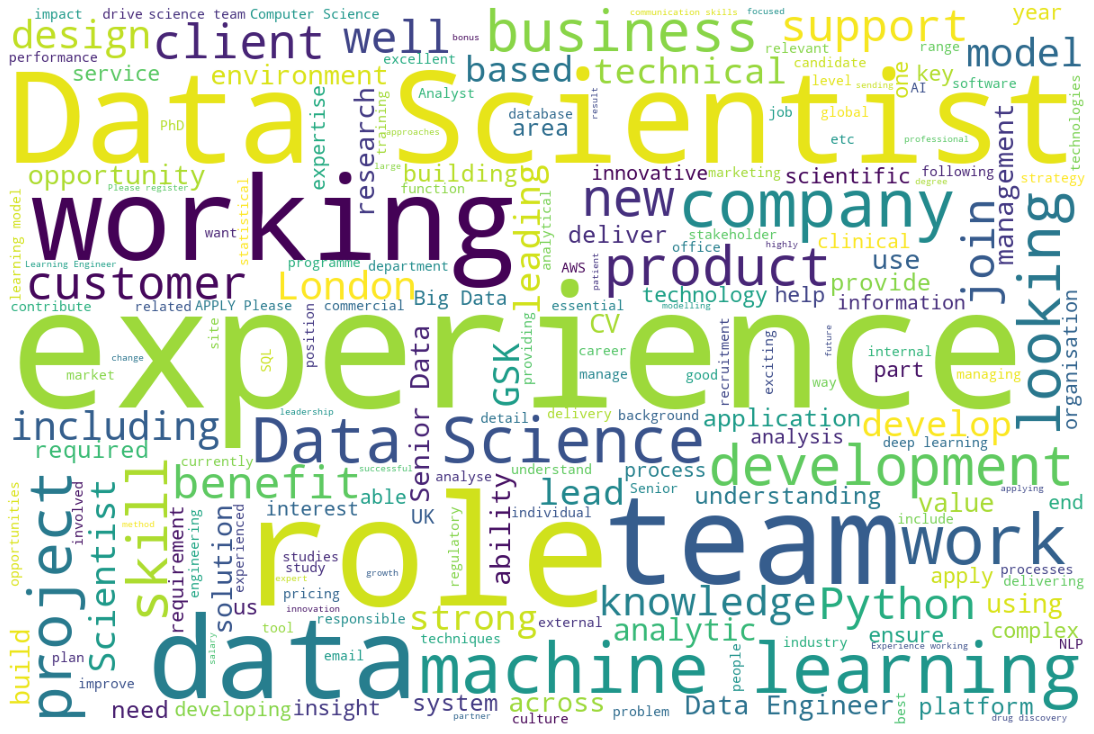

In [62]:
from wordcloud import WordCloud, STOPWORDS

text = ''
for desc in description_text:
    text+=desc

stopwords = set(STOPWORDS)

additional_stopwords = ['You will ','will be','be','will','You','within']
for sw in  additional_stopwords:
    stopwords.add(sw)
# Generate a word cloud image

# Display the generated image:
# the matplotlib way:
wordcloud=WordCloud(width = 1200, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text) 

# lower max_font_size
#wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize = (16, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 

plt.tight_layout(pad = 0) 
  
plt.savefig('data/white_wordcloud4.png')
plt.show()